In [1]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
import statsmodels as sm
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

Objective= The task of the project is to predict whether a person makes 50K a year or not as per given their demographic variation.

In [2]:
census=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\census_income.csv")
census.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Target variable is Income column and others are features column here based on that i have to predict whether a person makes more than 50k per annum

In [3]:
census.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


capital gain ,capital loss minimum ,25% 50 %,75 % values are 0 only it have maximum values means data is not uniformly distubuted in this column, standard deviation is also high

In [4]:
#check any missing values
census.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No missing data

In [5]:
print(census.shape ,census.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
(32560, 15) None


total rows 32560 ,15 column ,Income is class , rest(14) are features column

In [6]:
census.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
#print out each cataegorical data counts and types present in dataset
print('Workclass:',census.Workclass.unique())
print('Education',census.Education.unique())
print('Marital_status',census.Marital_status.unique())
print('Occupation',census.Occupation.unique())
print('Relationship',census.Relationship.unique())
print('Race',census.Race.unique())
print('Sex',census.Sex.unique())
print('Native_country',census.Native_country.unique())
print('Income',census.Income.unique())

Workclass: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Relationship [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Sex [' Male' ' Female']
Native_country [' United-States' ' Cuba' ' Jamaica' ' India'

In [8]:
#fill ' ?' with NAN values then will fillup with appropriate values 
census['Workclass']=census['Workclass'].replace(' ?',np.nan)
census['Occupation']=census['Occupation'].replace(' ?', np.nan)
census['Native_country']=census['Native_country'].replace(' ?',np.nan)

In [9]:
#all NAN are Categorical data will fillup by mode method 
census['Workclass']=census['Workclass'].fillna(census['Workclass'].mode()[0])
census['Occupation']=census['Occupation'].fillna(census['Occupation'].mode()[0])
census['Native_country']=census['Native_country'].fillna(census['Native_country'].mode()[0])

In [10]:
#print these column unique values to check data has fill up or not 
print('Workclass:',census.Workclass.unique())
print('Occupation',census.Occupation.unique())
print('Native_country',census.Native_country.unique())

Workclass: [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
Occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Native_country [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [11]:
#print tail 10 data
census.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [12]:
#encoding categorical data with label encoding 
from sklearn.preprocessing import LabelEncoder
census = census.apply(LabelEncoder().fit_transform)
census.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,9,12,2,3,0,4,1,0,0,12,38,0
1,21,3,14085,11,8,0,5,1,4,1,0,0,39,38,0
2,36,3,15335,1,6,2,5,0,2,1,0,0,39,38,0
3,11,3,19354,9,12,2,9,5,2,0,0,0,39,4,0
4,20,3,17699,12,13,2,3,5,4,0,0,0,39,38,0
5,32,3,8535,6,4,3,7,1,2,0,0,0,15,22,0
6,35,5,13619,11,8,2,3,0,4,1,0,0,44,38,1
7,14,3,1318,12,13,4,9,1,4,0,105,0,49,38,1
8,25,3,8459,9,12,2,3,0,4,1,79,0,39,38,1
9,20,3,17529,15,9,2,3,0,2,1,0,0,76,38,1


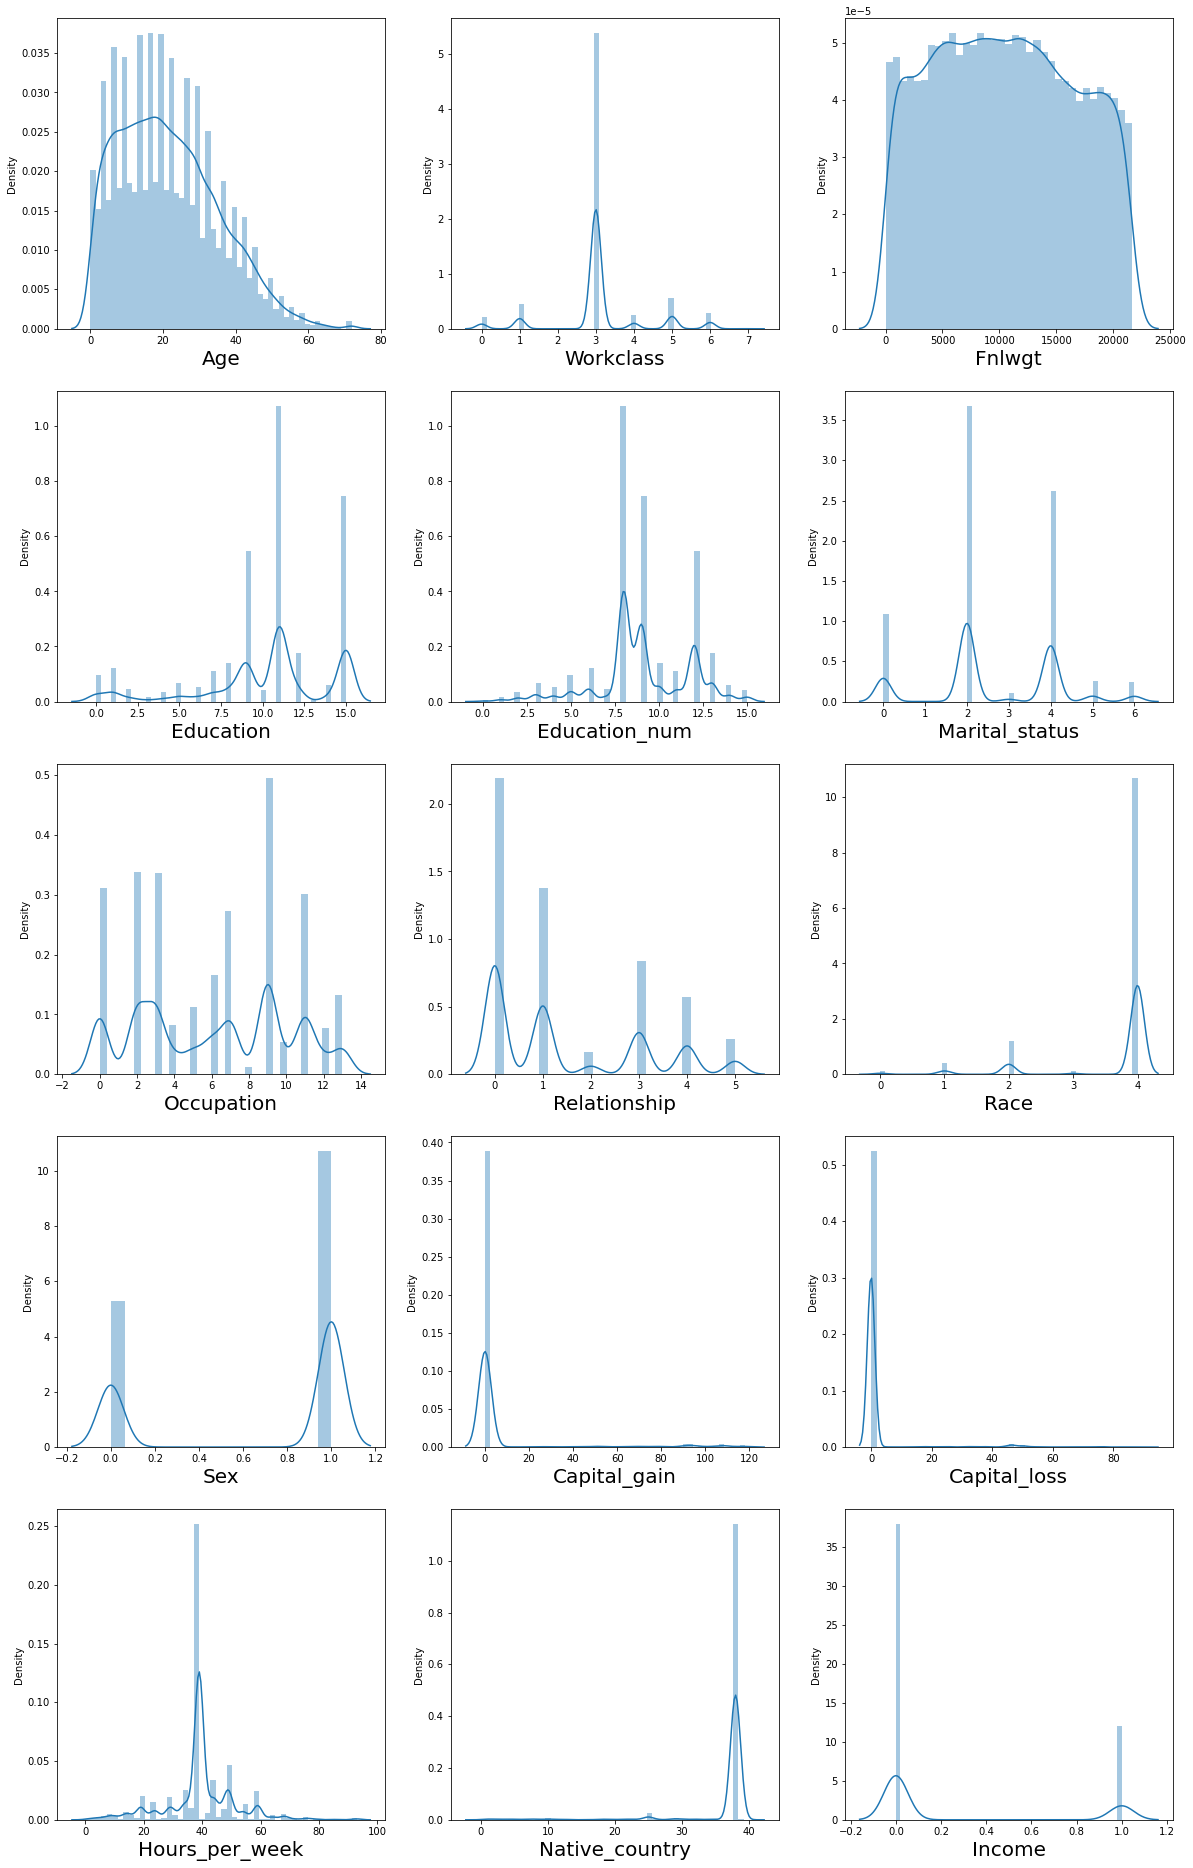

In [13]:
#lets plot data distribution 
plt.figure(figsize=(20,40))
plotnumber=1
for column in census:
    if plotnumber<=16:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(census[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()  

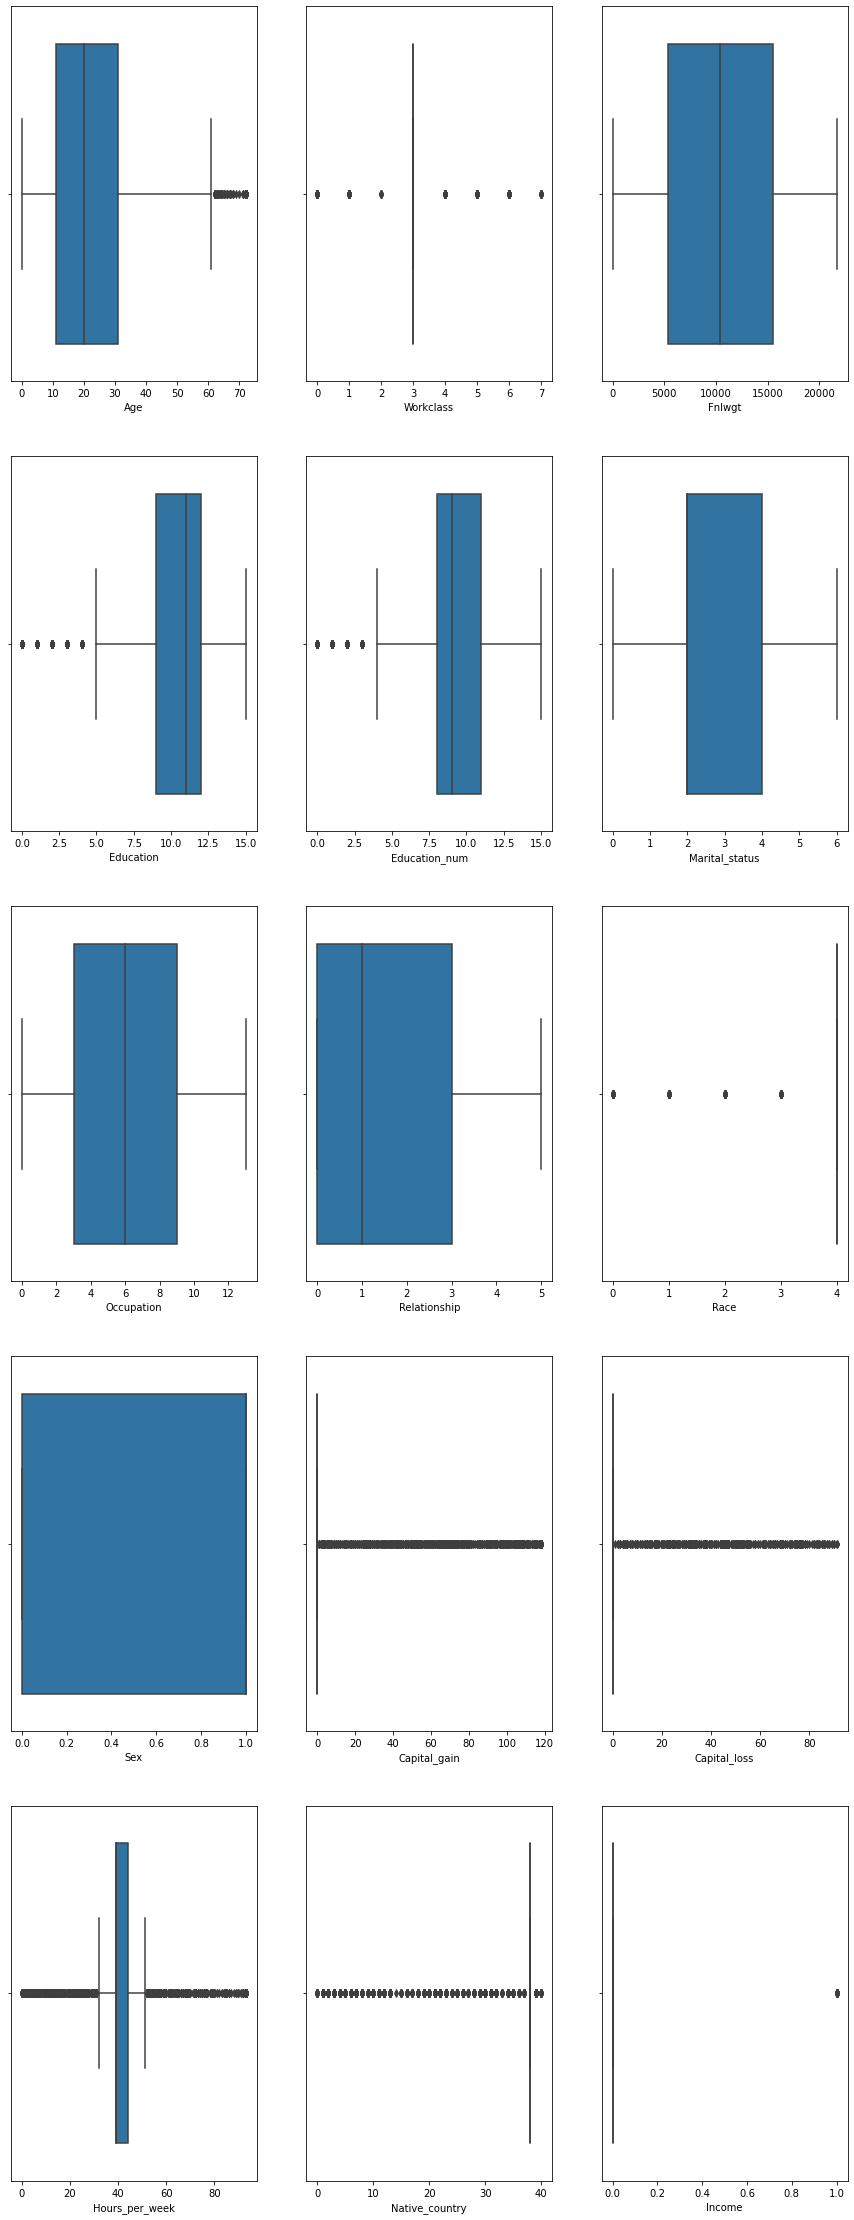

In [14]:
#Visualize the outliers using boxplot
plt.figure(figsize=(15,40))
graph=1
for column in census:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        ax=sns.boxplot(census[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()  

In [15]:
#applying Z score to remove outliers in dataset
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(census))
z

array([[0.83749664, 1.72133587, 1.25206002, ..., 2.25444135, 0.26137428,
        0.5632099 ],
       [0.042559  , 0.08522344, 0.59298455, ..., 0.03112222, 0.26137428,
        0.5632099 ],
       [1.05751055, 0.08522344, 0.79964277, ..., 0.03112222, 0.26137428,
        0.5632099 ],
       ...,
       [1.42420039, 0.08522344, 0.43253619, ..., 0.03112222, 0.26137428,
        0.5632099 ],
       [1.21596651, 0.08522344, 0.39376603, ..., 1.67802528, 0.26137428,
        0.5632099 ],
       [0.98417258, 0.81805622, 1.21114062, ..., 0.03112222, 0.26137428,
        1.77553698]])

In [16]:
print('row number\n', np.where(z>3)[0])
print('column number\n', np.where(z>3)[1])

row number
 [    3     7     8 ... 32550 32552 32559]
column number
 [13 10 10 ...  8  8 10]


In [17]:
index=np.where(z>3)[0]

In [18]:
data=census.drop(census.index[index])
data.shape

(27084, 15)

In [19]:
#original dataset shape
census.shape

(32560, 15)

In [20]:
#data loss
Data_loss=((32560-27084)/32560)*100

In [21]:
Data_loss

16.818181818181817

So data loss is 16 % and we will visualize that which data is removed 

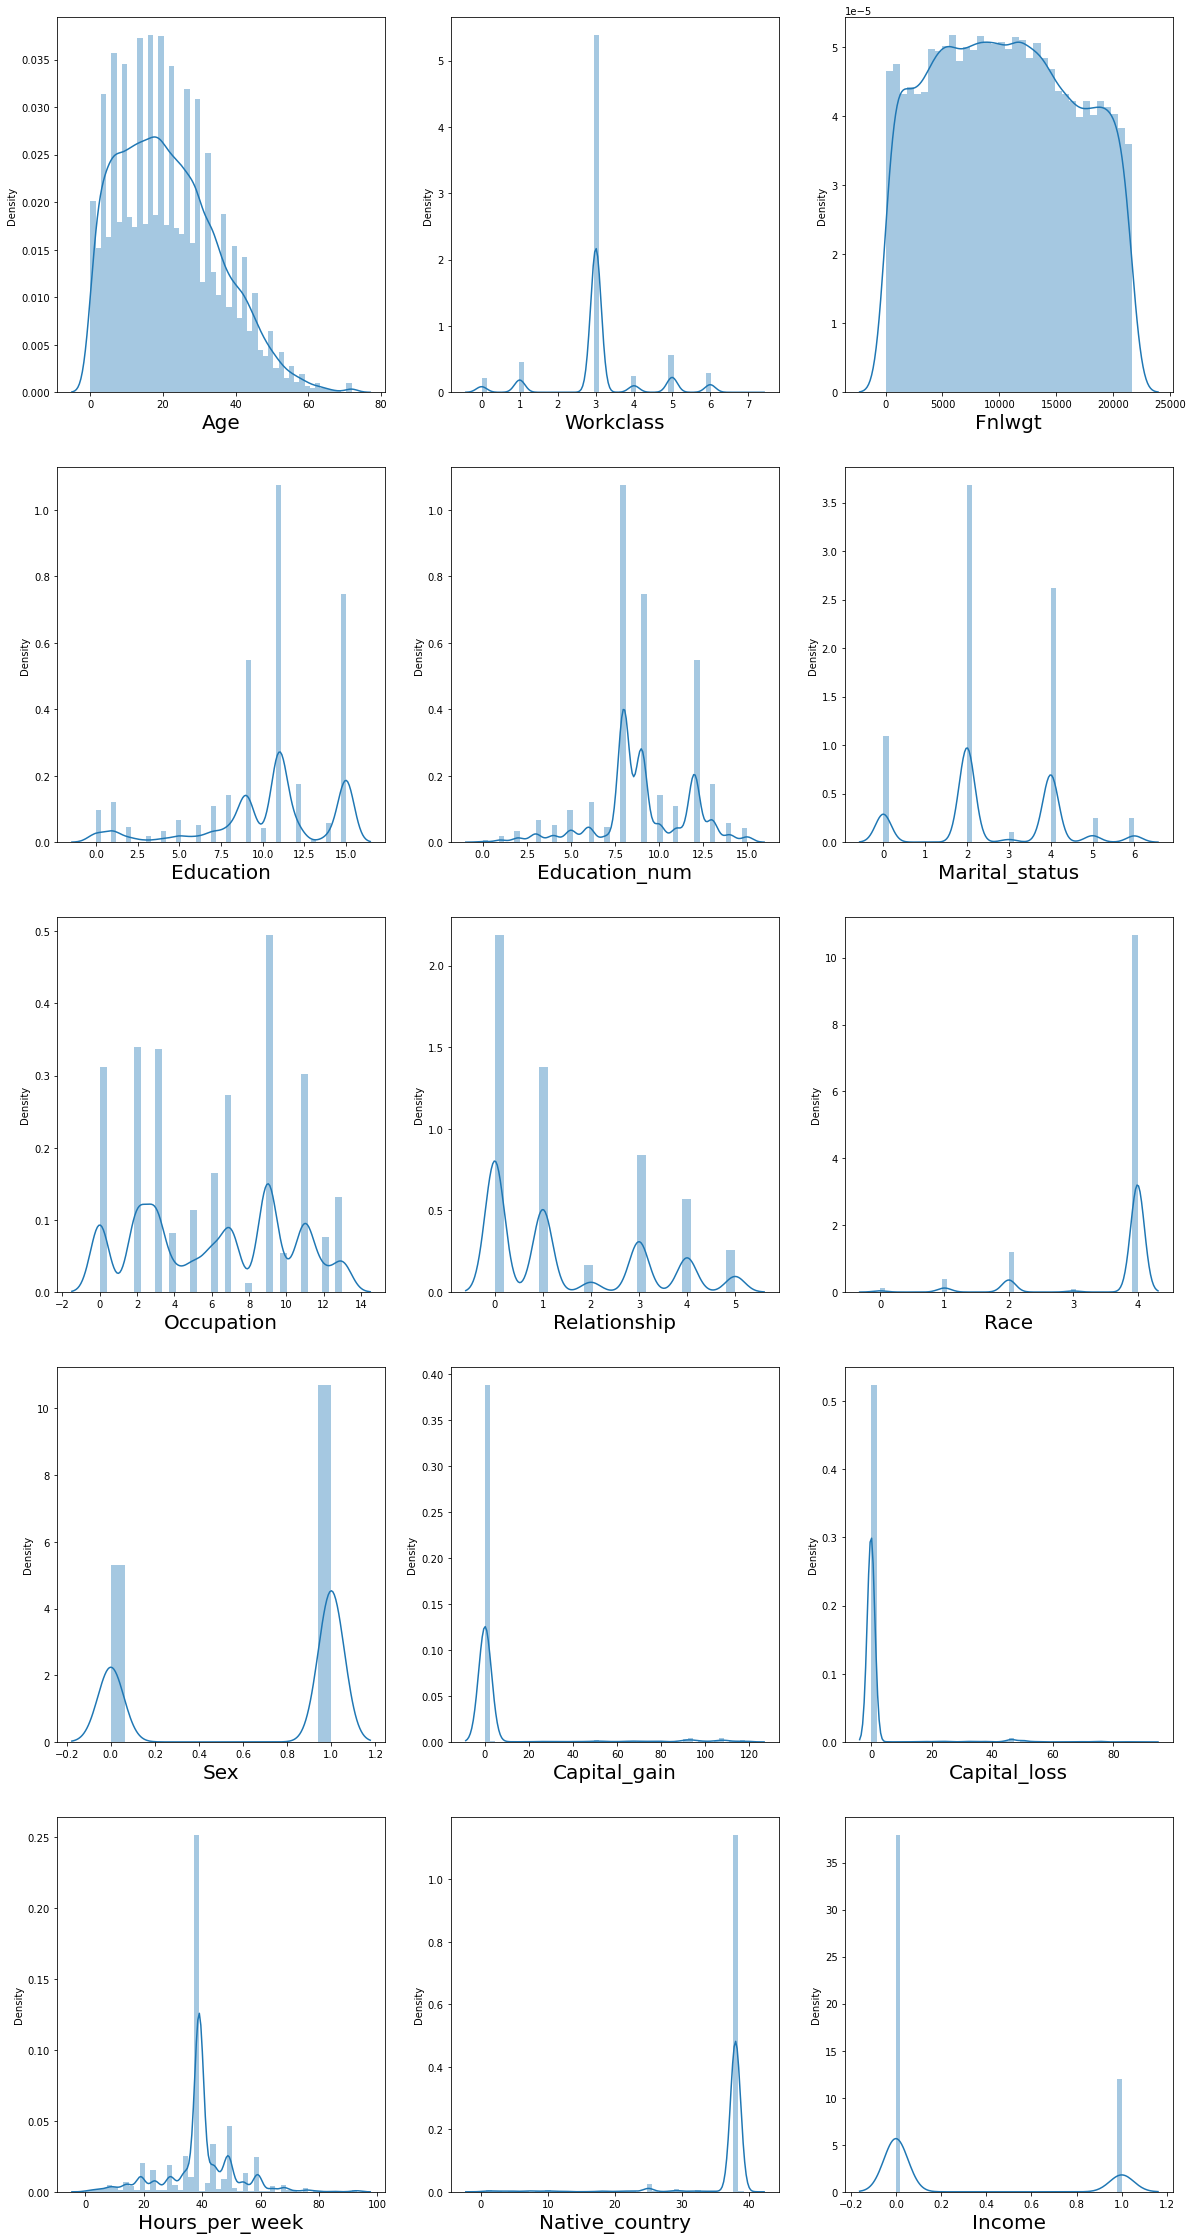

In [22]:
#visualization after removing outliers with plot data distribution 
plt.figure(figsize=(20,40))
plotnumber=1
for column in census:
    if plotnumber<=16:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(census[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()  

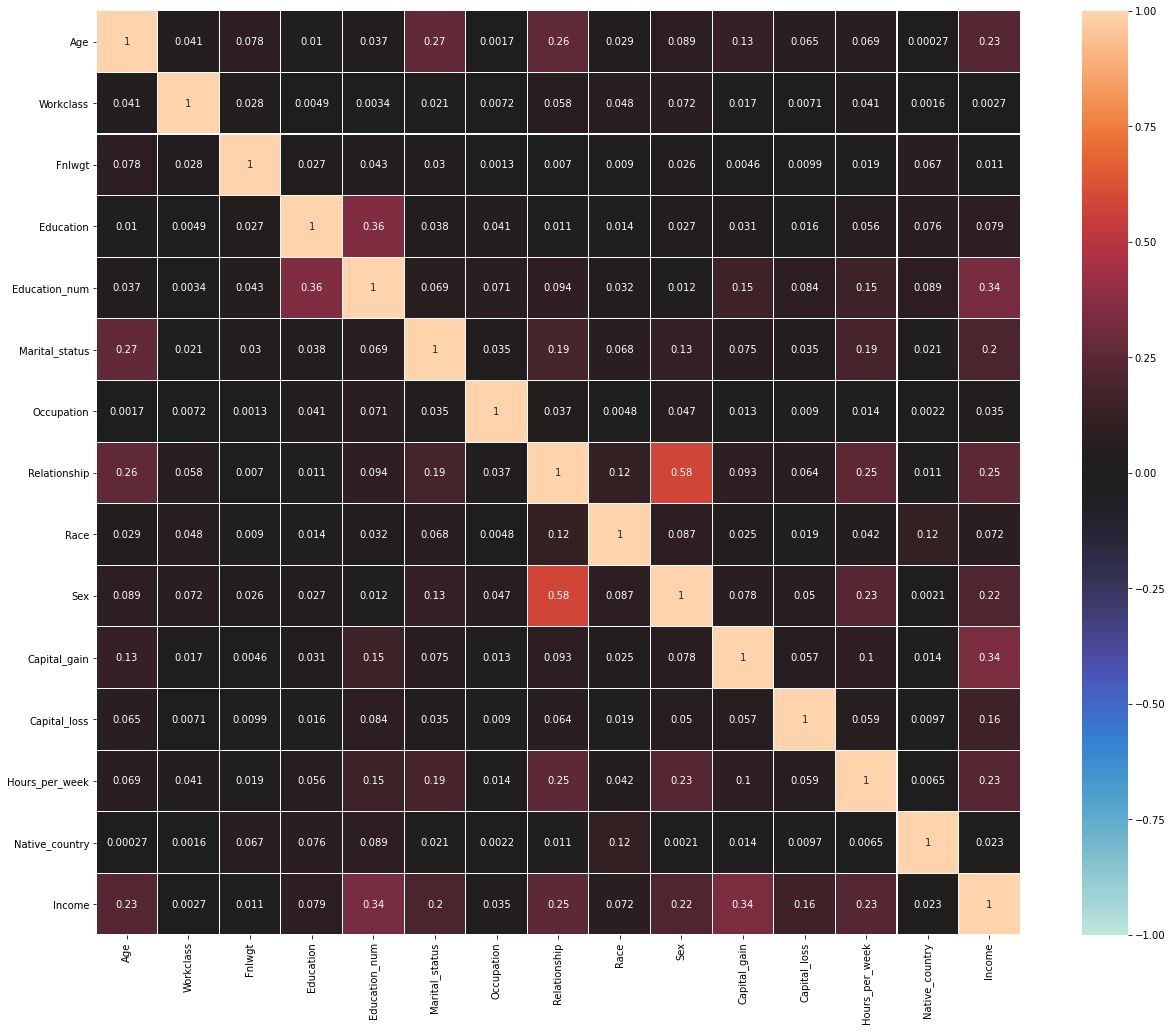

In [24]:
#Plotting Heatmap(Correlation matrix) to check multicollinearity between features
df_corr=census.corr().abs()
plt.figure(figsize=(22,17))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Relationship'>

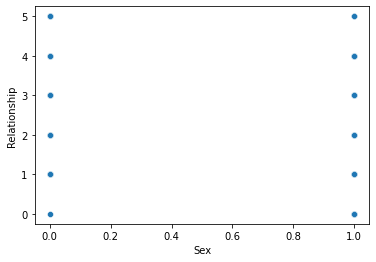

In [25]:
sns.scatterplot(x='Sex',y='Relationship',data=census)

<AxesSubplot:xlabel='Marital_status', ylabel='Age'>

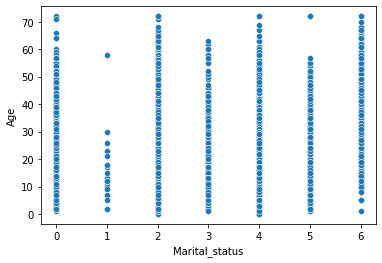

In [26]:
sns.scatterplot(x='Marital_status',y='Age',data=census)

So no multicollinearty between Sex and Relationship

In [27]:
corr_matrix=census.corr()
corr_matrix['Income'].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.340034
Education_num     0.335182
Age               0.234136
Hours_per_week    0.232394
Sex               0.215995
Capital_loss      0.162511
Education         0.079311
Race              0.071853
Occupation        0.034599
Native_country    0.023063
Workclass         0.002739
Fnlwgt           -0.010573
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

<AxesSubplot:title={'center':'correlation with target'}>

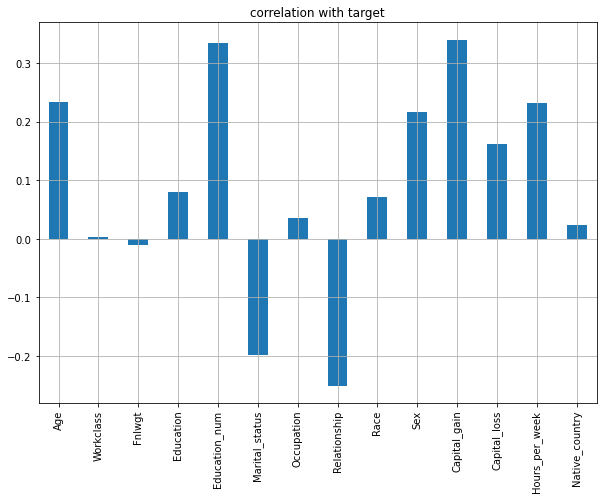

In [28]:
#take same data and visualize the correlation with class 
census.drop('Income',axis=1).corrwith(census.Income).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with target')

Workclass  Fnlwgt    Relationship     Marital_status  Capital_loss have negative relation with class ('Income')

<AxesSubplot:xlabel='Income', ylabel='count'>

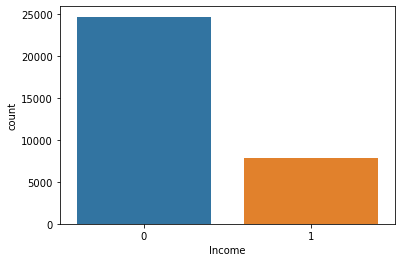

In [29]:
#check class is balanced or not
sns.countplot(x='Income',data=census)

Class 'Income' is unbalnced balnced with resampling method

# Seprating columns into featurs and Target

In [30]:
Y=census.Income
X=census.drop(columns='Income',axis=1)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7,stratify=Y)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.7)

In [33]:
from sklearn.utils import resample

In [34]:
x=pd.concat([x_train,y_train],axis=1)

In [35]:
Greater_50K=x[x.Income==1]
Lower_50k=x[x.Income==0]

In [36]:
#upsamling minority
sampled=resample(Lower_50k,replace=True, #sample with replacement
                   n_samples=len(Greater_50K), #match number is majority class
                    random_state=27) #reproduciable result

In [37]:
#combine majority and upsamled minority
upsample =pd.concat([sampled,Greater_50K])

In [38]:
#check new class counts   #upsampling use when dataset is small
upsample.Income.value_counts()

1    5488
0    5488
Name: Income, dtype: int64

now class is balanced we can build the model

In [39]:
#Scale the feature data and train test split
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,Y,test_size=0.25,random_state=12)

# Logistic Regression Model

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [118]:
y_pred=Lr.predict(x_test)

In [119]:
Lr.score(x_test,y_test)

0.8205159705159705

In [120]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      6814
           1       0.47      0.71      0.56      1326

    accuracy                           0.82      8140
   macro avg       0.70      0.77      0.72      8140
weighted avg       0.86      0.82      0.83      8140



In [121]:
confusion_matrix(y_pred,y_test)

array([[5742, 1072],
       [ 389,  937]], dtype=int64)

Hyperparameter Tuning of Logistic regression model

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
Lr = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],
               'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [124]:
grid_Lr = GridSearchCV(Lr, param_grid = grid_values,scoring = 'recall')
grid_Lr.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [125]:
grid_Lr.score(x_train,y_train)

0.4545610425240055

In [126]:
#Predict values based on new parameters
y_pred = grid_Lr.predict(x_test)

In [127]:
#New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))

print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8205159705159705
Precision Score : 0.7066365007541479
Recall Score : 0.46640119462419116
F1 Score : 0.5619190404797602


In [128]:
#cross validation of model
cross_val_score(grid_Lr,X_scaler,Y,cv=5).mean()

0.4551700842861045

Model is accurate as cross val score match with grid_Lr model score

# DecesionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred=dt.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8055282555282556


In [53]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[5309,  822],
       [ 761, 1248]], dtype=int64)

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6070
           1       0.62      0.60      0.61      2070

    accuracy                           0.81      8140
   macro avg       0.74      0.74      0.74      8140
weighted avg       0.80      0.81      0.80      8140



# Hyperparamter tuning

In [58]:
#we are tuning three hyperparameter right now,we are pasing the diffrent values for both parameters
grid_param={'criterion':['gini','entropy'], #gini and entropy for classification
           'max_depth': range(2,16,3),
           'min_samples_leaf':range(1,16,2),
           'min_samples_split':range(2,10,2)}

In [59]:
#cv= cross validation ,n_jobs menas apply entire CPU to do the job so that in increase process speed
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1) 

In [60]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 16, 3),
                         'min_samples_leaf': range(1, 16, 2),
                         'min_samples_split': range(2, 10, 2)})

In [61]:
#chose best parameters
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [63]:
#use these best paraeters now with Decesiontreeclassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=3,min_samples_split=4)

In [64]:
#now DecesionTreeClassifier model fit into train data and calcualte model score
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.8641277641277642

In [65]:
y_pred=dt.predict(x_test)

In [66]:
#classification report post tuning
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6725
           1       0.55      0.78      0.64      1415

    accuracy                           0.85      8140
   macro avg       0.75      0.82      0.77      8140
weighted avg       0.88      0.85      0.86      8140



In [67]:
from sklearn.model_selection  import  cross_val_score

In [68]:
cross_val_score(dt,X_scaler,Y,cv=5).mean()

0.8549447174447176

cross validation score is .85 and model score is .86 measn model is accurate  no overfitting issue

# KNN Classification model

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.8313267813267813


In [75]:
print(confusion_matrix(y_pred,y_test))

[[5490  732]
 [ 641 1277]]


In [76]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6222
           1       0.64      0.67      0.65      1918

    accuracy                           0.83      8140
   macro avg       0.77      0.77      0.77      8140
weighted avg       0.83      0.83      0.83      8140



Hyperparameter Tuning of KNN model

In [77]:
#parameters for tuning KNNclassifier model
param={ 'n_neighbors':[5,7,9,11,13],
    'weights':['uniform'],
    'algorithm':['auto'],
    'leaf_size':[4,8,12,16,30]
      }

In [78]:
#GridsearchCV  
grid_search=GridSearchCV(knn,param_grid=param,cv=5,n_jobs=-1)

In [79]:
#fit gridsearch into train data
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [4, 8, 12, 16, 30],
                         'n_neighbors': [5, 7, 9, 11, 13],
                         'weights': ['uniform']})

In [80]:
#find out best parameters to tune KNNmodel
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 4, 'n_neighbors': 13, 'weights': 'uniform'}

In [81]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=4,n_neighbors=13,weights='uniform')

In [83]:
#fit KNN model in to training dataset
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=4, n_neighbors=13)

In [84]:
knn.score(x_train,y_train)

0.8642096642096642

In [85]:
y_pred=knn.predict(x_test)

In [88]:
#print Classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      6313
           1       0.62      0.69      0.65      1827

    accuracy                           0.84      8140
   macro avg       0.77      0.78      0.77      8140
weighted avg       0.84      0.84      0.84      8140



In [89]:
#print confusion matrix
print(confusion_matrix(y_pred,y_test))

[[5558  755]
 [ 573 1254]]


In [90]:
#Cross validation score of KNN model
cross_val_score(knn,X_scaler,Y,cv=5).mean()

0.8428746928746929

# GradientBoostingClassifer Model

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gdbt_clf= GradientBoostingClassifier()
gdbt_clf.fit(x_train,y_train)
pred=gdbt_clf.predict(x_test)
print(classification_report(y_test,pred ))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6131
           1       0.78      0.61      0.68      2009

    accuracy                           0.86      8140
   macro avg       0.83      0.77      0.80      8140
weighted avg       0.85      0.86      0.85      8140



In [98]:
#print Confusion Matrix
print(confusion_matrix(pred,y_test))

[[5781  792]
 [ 350 1217]]


In [100]:
#model score
gdbt_clf.score(x_train,y_train)

0.8699426699426699

# Hyperparameter Tuning of GradientBoostClassifer Model

In [102]:
param={'loss':['deviance'],
    'learning_rate':[0.01,0.02,.1,.2,.7],
    'n_estimators':[50,100,150,200],
    'subsample':[1.0,2,4,6]}

In [103]:
#grid search 
grid_search=GridSearchCV(gdbt_clf,param_grid=param,cv=5,n_jobs=-1)

In [104]:
#fit gridsearch into model
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.1, 0.2, 0.7],
                         'loss': ['deviance'],
                         'n_estimators': [50, 100, 150, 200],
                         'subsample': [1.0, 2, 4, 6]})

In [105]:
#findout best parameters
grid_search.best_params_

{'learning_rate': 0.2,
 'loss': 'deviance',
 'n_estimators': 200,
 'subsample': 1.0}

In [106]:
#initiate with new parameters 
gdbt_clf=GradientBoostingClassifier(learning_rate=0.2,loss='deviance',n_estimators=200,subsample=1)

In [107]:
#train data set with new parameters
gdbt_clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=200, subsample=1)

In [110]:
#model accuracy
gdbt_clf.score(x_train,y_train)

0.8876330876330877

In [109]:
#classification report post tuning
pred=gdbt_clf.predict(x_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      6439
           1       0.66      0.78      0.71      1701

    accuracy                           0.87      8140
   macro avg       0.80      0.84      0.81      8140
weighted avg       0.88      0.87      0.87      8140



In [112]:
#print confusion Matrix
print(confusion_matrix(pred,y_test))

[[5755  684]
 [ 376 1325]]


In [113]:
#Cross Validation of GradientBoostClassifier model
cross_val_score(gdbt_clf,X_scaler,Y,cv=5).mean()

0.8712223587223586

In [114]:
#plot auc roc curve to choose best model
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

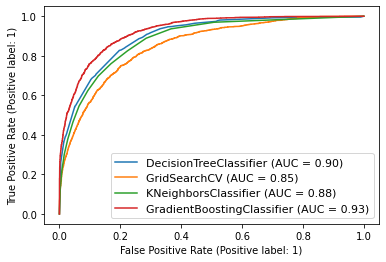

In [129]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(grid_Lr,x_test,y_test, ax=disp.ax_) #ax_ is axis with confusion matrix  ,it is way that combine other confusion mt
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gdbt_clf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [130]:
#as per roc_plot GradientBoostingClassifier model is best among all excuted will save for future use
#model Saving
import pickle
file='pikle_gdbd_clf_model'
with open(file ,'wb') as file:
    pickle.dump(gdbt_clf, file) 